# Data analysis

Plotting and statistical analysis of data generated by `build_distribution_data.ipynb`

## Source data

- Located in folder `./outputs/`
- `distribution_data.csv` 
- `municipality_data.csv` 


## Processing decisions

### Counting terminal topics once only in top-level categories

There is no double-counting of terminal topics within top-level categories.

### Assignment of additional topics

The additional four topics were assigned to `topics_list.csv` as follows:
- `principles_and_symbols/Basic_Principles/democ`
- `rights_and_duties/Legal Procedural Rights/rulelaw`
- `rights_and_duties/Economic_Rights/socsec`
- `elections/Suffrage_and_Turnout/votemin`

### Double-counting of sections/responses

Some segments may be above-threshold with more than one topic. This means there is a difference between the _size of the set of above-threshold segments_ (how many segments captured by one or more topics), and the _total of above-threshold segments across topics_, (how many captures by topics). For example for constitution sections there are:
- 5039 sections in the set of above-threshold sections
- 7184 sections that are above-threshold across topics

The distribution of segments across topics is the subject of analysis. For this reason, translation of segment counts to a 0 - 1 scale is based on the total of above-threshold segments. 



In [1]:
__author__      = 'Roy Gardner'
__copyright__   = 'Copyright 2023, Roy and Sally Gardner'

import csv
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import time

def plot_birectional(left,right,titles,max_x=0,labelled=False,file=''):
    """
    Plot a bidirectional graph with constitution section percentages on left and responses on right.
    x-axis is percentage of above-threshold sections or responses above-threshold for a topic or category
    y-axis is topic or category label (for all topics the label is the topic ID and is not shown)
    The left and right data sets must be the same length.
    param left: Data tuples (label,value) for the left side.
    param right: Data tuples (label,value) for the right side
    param titles: Left and right titles in a list [<left_title>,<right__title>]
    param max_x: Use to manually set the max_x value. If 0 defaults to maximum x + 1 of data series values
    param labelled: If True then display data tuple lables on the y-axis, otherwise just use integer 
    values over range of data
    """
    maxs = [] 
    maxs.append(max([t[1] for t in left]))
    maxs.append(max([t[1] for t in right]))

    if max_x == 0:
        max_x = int(max(maxs))+1
    else:
        max_x = max_x

    font_color = '#525252'
    facecolor = '#eaeaf2'
    color_red = '#fd625e'
    color_blue = '#01b8aa'
    index = list(range(0,len(left)))
    column0 = [t[1] for t in left]
    column1 = [t[1] for t in right]
    title0 = titles[0]
    title1 = titles[1]

    fig, axes = plt.subplots(figsize=(10,10), ncols=2, sharey=False)
    fig.tight_layout()

    axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
    axes[0].set_title(title0, fontsize=16, pad=15, color=color_red)
    axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
    axes[1].set_title(title1, fontsize=16, pad=15, color=color_blue)

    axes[0].invert_xaxis() 
    #plt.gca().invert_yaxis()

    plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

    axes[0].set_xticks(list(range(0,max_x+5,5)))
    axes[1].set_xticks(list(range(0,max_x+5,5)))
    axes[1].set_yticks([])

    if labelled:
        axes[0].set_yticks(range(0,len(left)))
        axes[0].set_yticklabels([t[0] for t in left])
    else:
        axes[0].set_ylabel('Topic index',fontsize='x-large',)
        

    axes[0].tick_params(labelsize='x-large')
    axes[1].tick_params(labelsize='x-large')
    #axes[0].set_ylabel('Ranked topics',fontsize='xx-large')
    axes[0].set_xlabel('% of above-threshold sections',fontsize='x-large',)
    axes[1].set_xlabel('% of above-threshold responses',fontsize='x-large',)

    #axes[0].xaxis.set_label_coords(1.025, -0.055)
    if len(file) > 0:
        plt.savefig('./figures/' + file + '.tif',dpi=300,bbox_inches='tight')
    plt.show()


In [2]:
# Create directory for saving figures
os.mkdir("./figures/") 

## Load the distribution data files

In [3]:

# Distribution data
distribution_data = []
with open('./outputs/distribution_data.csv','r',encoding='utf-8',errors='ignore') as f:
    reader = csv.reader(f)
    dist_header = next(reader)
    for row in reader:
        distribution_data.append(row)
    f.close()

# Municipality data
municipality_data = []
with open('./outputs/municipality_data.csv','r',encoding='utf-8',errors='ignore') as f:
    reader = csv.reader(f)
    municipality_header = next(reader)
    for row in reader:
        municipality_data.append(row)
    f.close()


In [4]:
print(dist_header)

['Topic ID', 'Topic label', 'Topic categories', 'Rights topic', 'Institution topic', '# Constitution sections', 'Scaled Constitution sections', '% Constitution sections', '# Regional responses', 'Scaled Regional responses', '% Regional responses', '# Provincial responses', 'Scaled Provincial responses', '% Provincial responses', '# ELA responses', 'Scaled ELA responses', '% ELA responses', '# Aggregated responses', 'Scaled Aggregated responses', '% Aggregated responses']


## Top-10 topics

- Constitution sections
- Aggregated over source types

Done programmatically, but could sort the `distribution_data.csv` spreadsheet.


In [5]:

sorted_const_data = sorted(distribution_data,key=lambda t:\
                           int(t[dist_header.index('# Constitution sections')]),reverse=True)
print([(t[0],t[1]) for t in sorted_const_data[0:10]])
print()

sorted_response_data = sorted(distribution_data,key=lambda t:\
                           int(t[dist_header.index('# Aggregated responses')]),reverse=True)
print([(t[0],t[1]) for t in sorted_response_data[0:10]])

[('conpow', 'Constitutional court powers'), ('suppow', 'Supreme court powers'), ('judcrts2', 'Constitutional court'), ('conrem', 'Constitutional court removal'), ('depexec', 'Deputy executive'), ('judprec', 'Judicial precedent'), ('consel', 'Constitutional court selection'), ('cabinet', 'Cabinet/ministers'), ('ecres', 'Electoral court eligibility'), ('hocres', 'Supreme court eligibility')]

[('equal', 'Equality before the law'), ('equalgr1', 'Equality regardless of gender'), ('equalgr7', 'Equality regardless of sexual orientation'), ('equalgr6', 'Equality regardless of religion'), ('democ', 'Democracy'), ('equalgr4', 'Equality regardless of race'), ('conpow', 'Constitutional court powers'), ('env', 'Environment'), ('amend', 'Constitution amendment'), ('suppow', 'Supreme court powers')]


## Analysis by top-level category

- Dependency on cell above `all_counts_dict`
- Only counting a topic once within the top-level categories.


### Figure 2: Analysis by top-level category


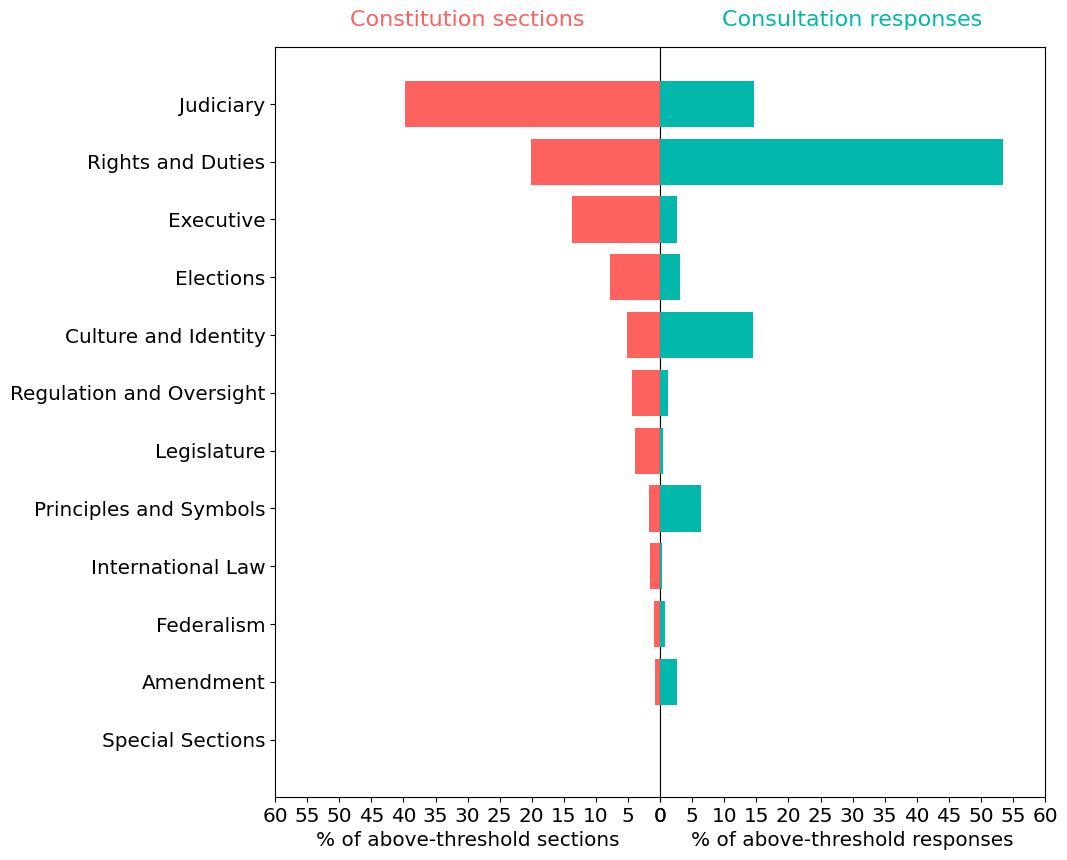

In [6]:
# Get the counts in each category 
cat_counts_dict = {}

for row in distribution_data:
    cats = row[dist_header.index('Topic categories')].split(',')
    for cat in cats:
        if cat in cat_counts_dict:
            cat_counts_dict[cat][0] += int(row[dist_header.index('# Constitution sections')])
            cat_counts_dict[cat][1] += int(row[dist_header.index('# Aggregated responses')])
            cat_counts_dict[cat][2] += int(row[dist_header.index('# Regional responses')])
            cat_counts_dict[cat][3] += int(row[dist_header.index('# Provincial responses')])
            cat_counts_dict[cat][4] += int(row[dist_header.index('# ELA responses')])
        else:
            cat_counts_dict[cat] = [int(row[dist_header.index('# Constitution sections')]),\
                                   int(row[dist_header.index('# Aggregated responses')]),\
                                   int(row[dist_header.index('# Regional responses')]),\
                                   int(row[dist_header.index('# Provincial responses')]),\
                                   int(row[dist_header.index('# ELA responses')])]

tot_const = sum([v[0] for _,v in cat_counts_dict.items()])
tot_aggr = sum([v[1] for _,v in cat_counts_dict.items()])
tot_reg = sum([v[2] for _,v in cat_counts_dict.items()])
tot_prov = sum([v[3] for _,v in cat_counts_dict.items()])
tot_ela = sum([v[4] for _,v in cat_counts_dict.items()])

# Convert counts to percentages of total
percent_dict = {}
for k,v in cat_counts_dict.items():
    percent_dict[k] = [round((v[0]/tot_const)*100,2),\
                       round((v[1]/tot_aggr)*100,2),\
                       round((v[2]/tot_aggr)*100,2),\
                       round((v[3]/tot_aggr)*100,2),\
                       round((v[4]/tot_aggr)*100,2)]

# Sort by constitutions scores
sorted_percent_dict = sorted(percent_dict.items(),key=lambda kv:kv[1][0],reverse=False)

plot_birectional([(t[0],t[1][0]) for t in sorted_percent_dict],[(t[0],t[1][1]) for t in sorted_percent_dict],\
                 ['Constitution sections','Consultation responses'],max_x=60,labelled=True,file='figure_2')


### Stats - constitutions and source type

In [7]:
# Print stats
print('Const-Aggr',stats.pearsonr(\
            [v[0] for k,v in percent_dict.items()],[v[1] for k,v in percent_dict.items()]))
print('Const-Reg',stats.pearsonr(\
            [v[0] for k,v in percent_dict.items()],[v[2] for k,v in percent_dict.items()]))
print('Const-Prov',stats.pearsonr(\
            [v[0] for k,v in percent_dict.items()],[v[3] for k,v in percent_dict.items()]))
print('Const-ELA',stats.pearsonr(\
            [v[0] for k,v in percent_dict.items()],[v[4] for k,v in percent_dict.items()]))

print()

print('Reg-Prov',stats.pearsonr(\
            [v[2] for k,v in percent_dict.items()],[v[3] for k,v in percent_dict.items()]))
print('Reg-ELA',stats.pearsonr(\
            [v[2] for k,v in percent_dict.items()],[v[4] for k,v in percent_dict.items()]))
print('Prov-ELA',stats.pearsonr(\
            [v[3] for k,v in percent_dict.items()],[v[4] for k,v in percent_dict.items()]))

Const-Aggr PearsonRResult(statistic=0.5104884727379758, pvalue=0.0899144996357095)
Const-Reg PearsonRResult(statistic=0.5095885003771254, pvalue=0.09057813552915786)
Const-Prov PearsonRResult(statistic=0.5166315543687489, pvalue=0.08547216723398951)
Const-ELA PearsonRResult(statistic=0.5095088287237213, pvalue=0.09063704384062035)

Reg-Prov PearsonRResult(statistic=0.9996915921474123, pvalue=2.196111839450288e-17)
Reg-ELA PearsonRResult(statistic=0.9972048103019081, pvalue=1.3374658255323753e-12)
Prov-ELA PearsonRResult(statistic=0.9984967452495249, pvalue=6.030107902462232e-14)


## Analysis by all topics

- Aggregate responses
- Separate responses


### Figure 1: Analysis using source types

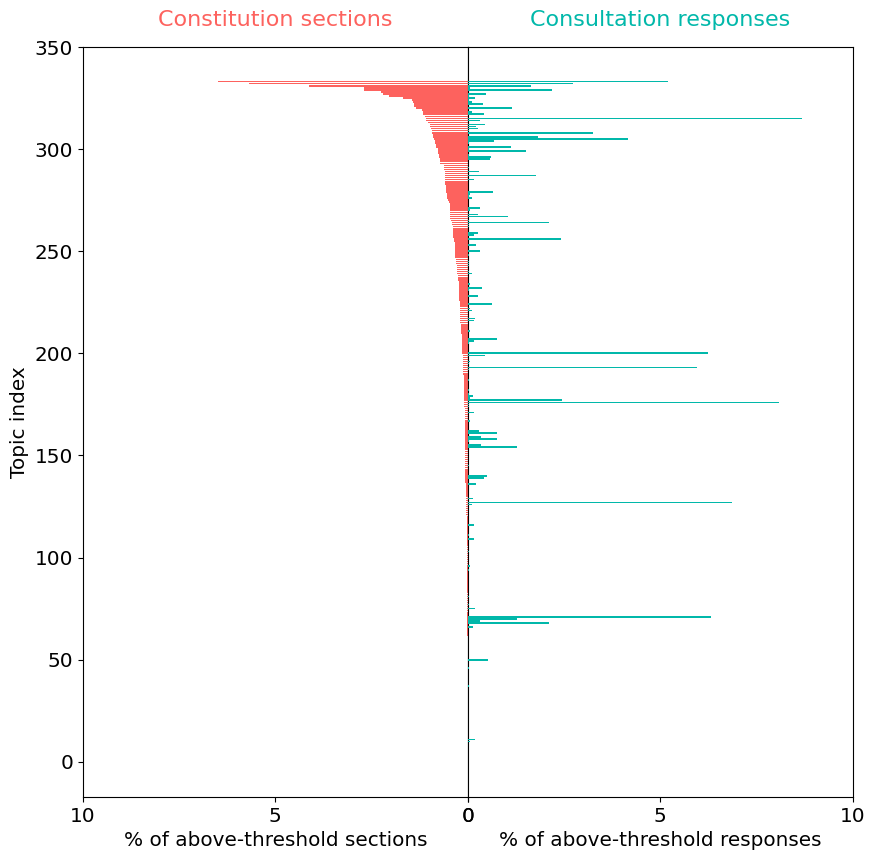

In [8]:
const_dict = {row[0]:float(row[dist_header.index('% Constitution sections')]) for row in distribution_data}
sorted_const_dict = sorted(const_dict.items(),key=lambda kv:kv[1],reverse=False)

response_dict = {row[0]:float(row[dist_header.index('% Aggregated responses')]) for row in distribution_data}

# Get aggregated responses in same order as constitutions
sorted_response_dict = []
for t in sorted_const_dict:
    sorted_response_dict.append((t[0],response_dict[t[0]]))

plot_birectional(sorted_const_dict,sorted_response_dict,\
                             ['Constitution sections','Consultation responses'],labelled=False,file='figure_1')

### Stats - constitutions and source type

In [9]:
# Print stats
print('Const-Aggr',stats.pearsonr(\
            [float(row[dist_header.index('% Constitution sections')]) for row in distribution_data],\
            [float(row[dist_header.index('% Aggregated responses')]) for row in distribution_data]))
print('Const-Reg',stats.pearsonr(\
            [float(row[dist_header.index('% Constitution sections')]) for row in distribution_data],\
            [float(row[dist_header.index('% Regional responses')]) for row in distribution_data]))
print('Const-Prov',stats.pearsonr(\
            [float(row[dist_header.index('% Constitution sections')]) for row in distribution_data],\
            [float(row[dist_header.index('% Provincial responses')]) for row in distribution_data]))
print('Const-ELA',stats.pearsonr(\
            [float(row[dist_header.index('% Constitution sections')]) for row in distribution_data],\
            [float(row[dist_header.index('% ELA responses')]) for row in distribution_data]))

print()

print('Reg-Prov',stats.pearsonr(\
            [float(row[dist_header.index('% Regional responses')]) for row in distribution_data],\
            [float(row[dist_header.index('% Provincial responses')]) for row in distribution_data]))
print('Reg-ELA',stats.pearsonr(\
            [float(row[dist_header.index('% Regional responses')]) for row in distribution_data],\
            [float(row[dist_header.index('% ELA responses')]) for row in distribution_data]))
print('Prov-ELA',stats.pearsonr(\
            [float(row[dist_header.index('% Provincial responses')]) for row in distribution_data],\
            [float(row[dist_header.index('% ELA responses')]) for row in distribution_data]))



Const-Aggr PearsonRResult(statistic=0.293714457223052, pvalue=4.5311089194711884e-08)
Const-Reg PearsonRResult(statistic=0.3262628057189315, pvalue=1.0071867616367065e-09)
Const-Prov PearsonRResult(statistic=0.3165380249115807, pvalue=3.297333200566689e-09)
Const-ELA PearsonRResult(statistic=0.2854051456610738, pvalue=1.1131914926246761e-07)

Reg-Prov PearsonRResult(statistic=0.9956562350455341, pvalue=0.0)
Reg-ELA PearsonRResult(statistic=0.9487926287866678, pvalue=3.2659901585257315e-168)
Prov-ELA PearsonRResult(statistic=0.9647129702542786, pvalue=1.7713683406346084e-194)


### Analysis of municipality types

Municipality type is aggregated in the Provincial and ELA source types so we ask:

1. What is the association between municipality types within the Provincial and ELA source types.
2. What is the association between each of the municipality types across the Provincial and ELA source types.


In [10]:

print('Prov_urban-Prov_rural',stats.pearsonr(\
            [float(row[municipality_header.index('% Provincial Urban')]) for row in municipality_data],\
            [float(row[municipality_header.index('% Provincial Rural')]) for row in municipality_data]))
print('Prov_urban-Prov_mixed',stats.pearsonr(\
            [float(row[municipality_header.index('% Provincial Urban')]) for row in municipality_data],\
            [float(row[municipality_header.index('% Provincial Mixed')]) for row in municipality_data]))
print('Prov_rural-Prov_mixed',stats.pearsonr(\
            [float(row[municipality_header.index('% Provincial Rural')]) for row in municipality_data],\
            [float(row[municipality_header.index('% Provincial Mixed')]) for row in municipality_data]))
print()

print('ELA_urban-ELA_rural',stats.pearsonr(\
            [float(row[municipality_header.index('% ELA Urban')]) for row in municipality_data],\
            [float(row[municipality_header.index('% ELA Rural')]) for row in municipality_data]))
print('ELA_urban-ELA_mixed',stats.pearsonr(\
            [float(row[municipality_header.index('% ELA Urban')]) for row in municipality_data],\
            [float(row[municipality_header.index('% ELA Mixed')]) for row in municipality_data]))
print('ELA_rural-ELA_mixed',stats.pearsonr(\
            [float(row[municipality_header.index('% ELA Rural')]) for row in municipality_data],\
            [float(row[municipality_header.index('% ELA Mixed')]) for row in municipality_data]))

print()

print('Prov_urban-ELA_urban',stats.pearsonr(\
            [float(row[municipality_header.index('% Provincial Urban')]) for row in municipality_data],\
            [float(row[municipality_header.index('% ELA Urban')]) for row in municipality_data]))
print('Prov_rural-ELA_rural',stats.pearsonr(\
            [float(row[municipality_header.index('% Provincial Rural')]) for row in municipality_data],\
            [float(row[municipality_header.index('% ELA Rural')]) for row in municipality_data]))
print('Prov_mixed-ELA_mixed',stats.pearsonr(\
            [float(row[municipality_header.index('% Provincial Mixed')]) for row in municipality_data],\
            [float(row[municipality_header.index('% ELA Mixed')]) for row in municipality_data]))


Prov_urban-Prov_rural PearsonRResult(statistic=0.9631252741503569, pvalue=2.3099948709171643e-191)
Prov_urban-Prov_mixed PearsonRResult(statistic=0.9280783121253551, pvalue=1.7485739248896465e-144)
Prov_rural-Prov_mixed PearsonRResult(statistic=0.9503131442529792, pvalue=2.491443427461987e-170)

ELA_urban-ELA_rural PearsonRResult(statistic=0.9918005040274405, pvalue=1.0187678263675654e-298)
ELA_urban-ELA_mixed PearsonRResult(statistic=0.9929284505441089, pvalue=2.394151390294197e-309)
ELA_rural-ELA_mixed PearsonRResult(statistic=0.9943051217587413, pvalue=0.0)

Prov_urban-ELA_urban PearsonRResult(statistic=0.9593861161297462, pvalue=1.5517914639590148e-184)
Prov_rural-ELA_rural PearsonRResult(statistic=0.9748680057720234, pvalue=1.4093682804792347e-218)
Prov_mixed-ELA_mixed PearsonRResult(statistic=0.9219757669911738, pvalue=7.732971587551608e-139)


## Rights topics

### Figures 3a and 3b

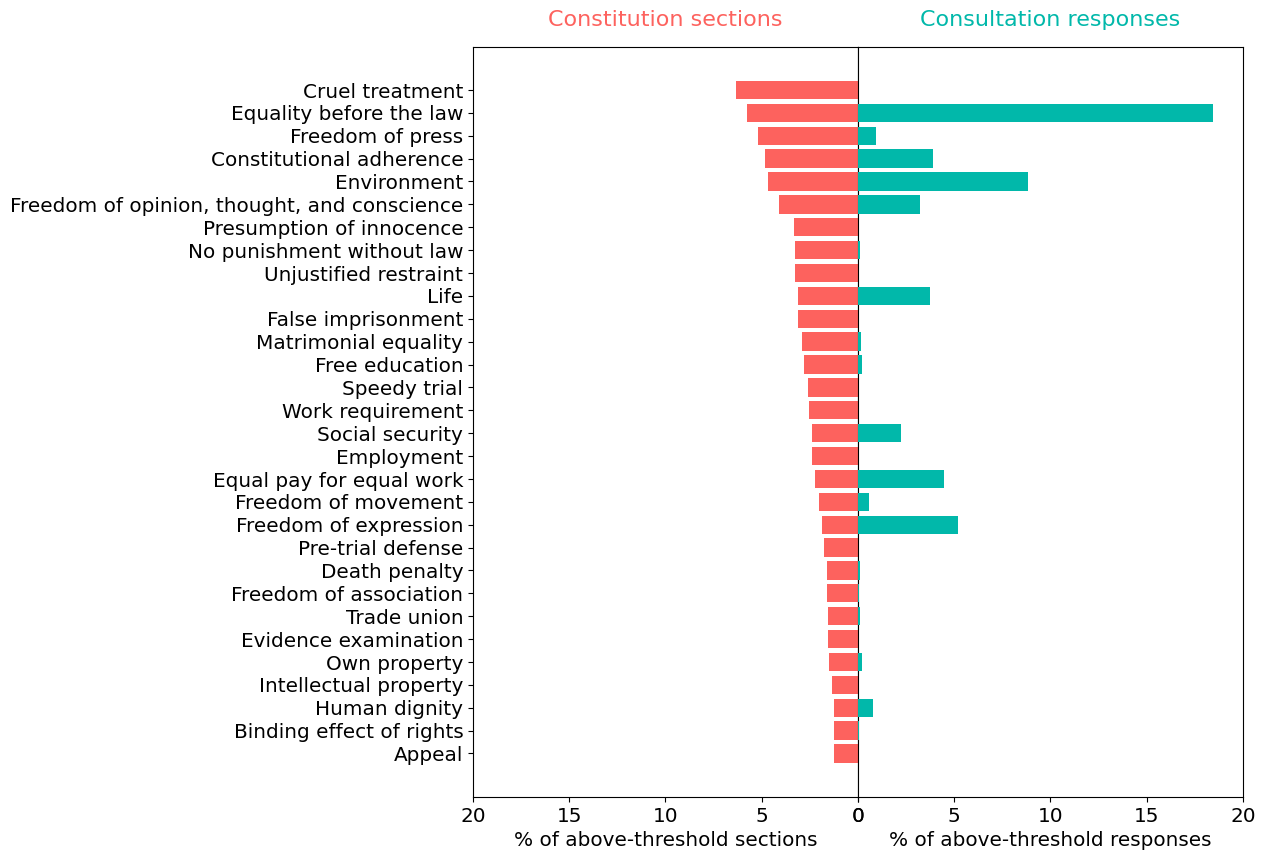

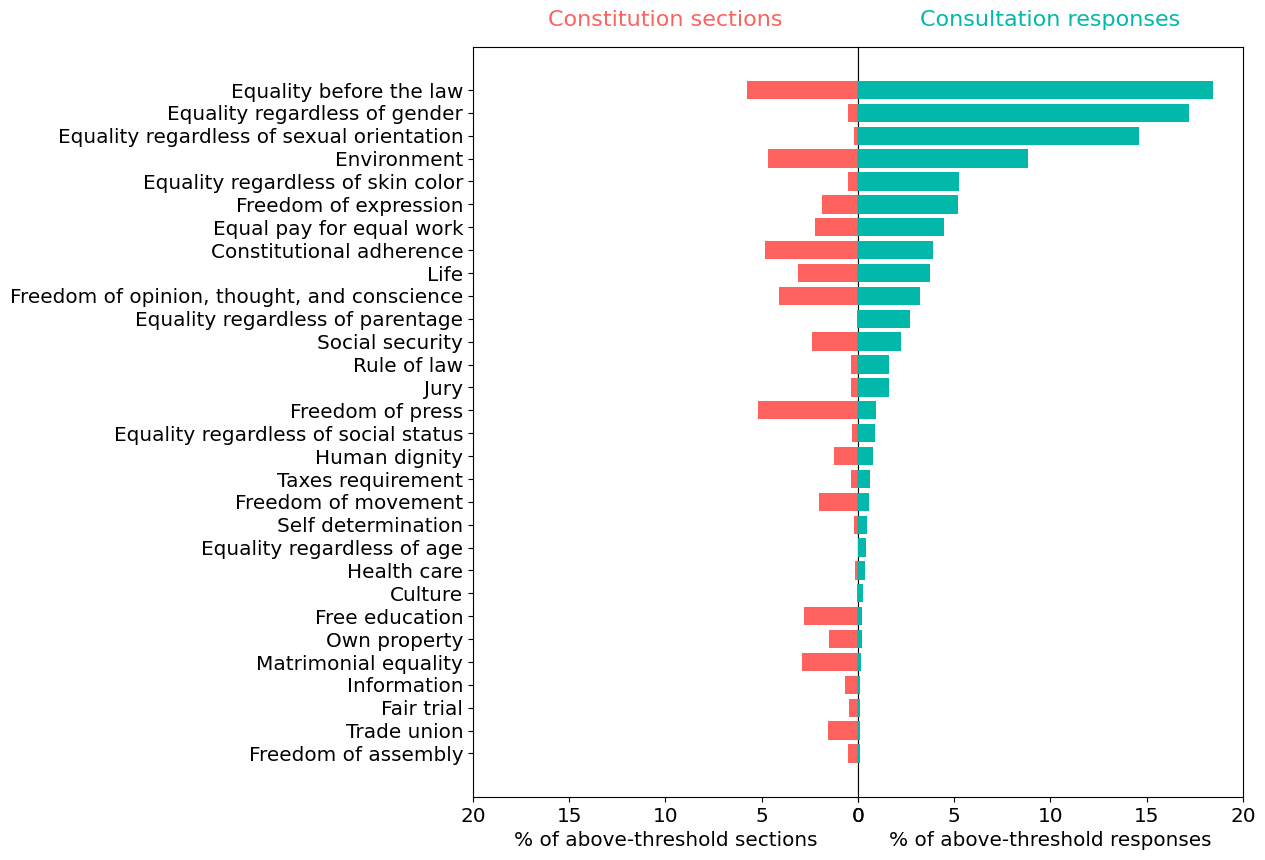

In [11]:
rights_counts_dict = {}

for row in distribution_data:
    if int(row[dist_header.index('Rights topic')]) == 1:
        # Use topic labels not IDs
        rights_counts_dict[row[1]] = []
        rights_counts_dict[row[1]].append(int(row[dist_header.index('# Constitution sections')]))
        rights_counts_dict[row[1]].append(int(row[dist_header.index('# Aggregated responses')]))
        rights_counts_dict[row[1]].append(int(row[dist_header.index('# Regional responses')]))
        rights_counts_dict[row[1]].append(int(row[dist_header.index('# Provincial responses')]))
        rights_counts_dict[row[1]].append(int(row[dist_header.index('# ELA responses')]))

tot_const = sum([v[0] for _,v in rights_counts_dict.items()])
tot_aggr = sum([v[1] for _,v in rights_counts_dict.items()])
tot_reg = sum([v[2] for _,v in rights_counts_dict.items()])
tot_prov = sum([v[3] for _,v in rights_counts_dict.items()])
tot_ela = sum([v[4] for _,v in rights_counts_dict.items()])

# Convert counts to percentages of total
rights_percent_dict = {}
for k,v in rights_counts_dict.items():
    rights_percent_dict[k] = [round((v[0]/tot_const)*100,2),\
                       round((v[1]/tot_aggr)*100,2),\
                       round((v[2]/tot_aggr)*100,2),\
                       round((v[3]/tot_aggr)*100,2),\
                       round((v[4]/tot_aggr)*100,2)]

# Sort by constitutions scores
sorted_percent_dict = sorted(rights_percent_dict.items(),key=lambda kv:kv[1][0],reverse=False)

plot_birectional([(t[0],t[1][0]) for t in sorted_percent_dict][-30:],\
                 [(t[0],t[1][1]) for t in sorted_percent_dict][-30:],\
                 ['Constitution sections','Consultation responses'],labelled=True,file='figure_3a')

# Sort by agrregated scores scores
sorted_percent_dict = sorted(rights_percent_dict.items(),key=lambda kv:kv[1][1],reverse=False)

plot_birectional([(t[0],t[1][0]) for t in sorted_percent_dict][-30:],\
                 [(t[0],t[1][1]) for t in sorted_percent_dict][-30:],\
                 ['Constitution sections','Consultation responses'],labelled=True,file='figure_3b')


### Stats constitutions and response source types

In [12]:

# Print stats
print('Const-Aggr',stats.pearsonr(\
            [v[0] for k,v in rights_percent_dict.items()],[v[1] for k,v in rights_percent_dict.items()]))
print('Const-Reg',stats.pearsonr(\
            [v[0] for k,v in rights_percent_dict.items()],[v[2] for k,v in rights_percent_dict.items()]))
print('Const-Prov',stats.pearsonr(\
            [v[0] for k,v in rights_percent_dict.items()],[v[3] for k,v in rights_percent_dict.items()]))
print('Const-ELA',stats.pearsonr(\
            [v[0] for k,v in rights_percent_dict.items()],[v[4] for k,v in rights_percent_dict.items()]))

print()

print('Reg-Prov',stats.pearsonr(\
            [v[2] for k,v in rights_percent_dict.items()],[v[3] for k,v in rights_percent_dict.items()]))
print('Reg-ELA',stats.pearsonr(\
            [v[2] for k,v in rights_percent_dict.items()],[v[4] for k,v in rights_percent_dict.items()]))
print('Prov-ELA',stats.pearsonr(\
            [v[3] for k,v in rights_percent_dict.items()],[v[4] for k,v in rights_percent_dict.items()]))


Const-Aggr PearsonRResult(statistic=0.3226601081818888, pvalue=0.0012671965824825855)
Const-Reg PearsonRResult(statistic=0.3726772427602867, pvalue=0.00017043654279312904)
Const-Prov PearsonRResult(statistic=0.35300350178695117, pvalue=0.00039038129414240247)
Const-ELA PearsonRResult(statistic=0.31212631593379125, pvalue=0.0018558369674237067)

Reg-Prov PearsonRResult(statistic=0.9961238722884627, pvalue=4.1821687287006845e-102)
Reg-ELA PearsonRResult(statistic=0.9510257731946499, pvalue=3.120503059736921e-50)
Prov-ELA PearsonRResult(statistic=0.9684548767441381, pvalue=3.9427611776524834e-59)


### Stats municipality

In [13]:
rights_municipality_count_dict = {}

for row in municipality_data:
    if int(row[dist_header.index('Rights topic')]) == 1:
        rights_municipality_count_dict[row[0]] = []
        rights_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# Provincial Urban')]))
        rights_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# Provincial Rural')]))
        rights_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# Provincial Mixed')]))
        rights_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# ELA Urban')]))
        rights_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# ELA Rural')]))
        rights_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# ELA Mixed')]))

tot_prov_urban = sum([v[0] for _,v in rights_municipality_count_dict.items()])
tot_prov_rural = sum([v[1] for _,v in rights_municipality_count_dict.items()])
tot_prov_mixed = sum([v[2] for _,v in rights_municipality_count_dict.items()])
tot_ela_urban = sum([v[3] for _,v in rights_municipality_count_dict.items()])
tot_ela_rural = sum([v[4] for _,v in rights_municipality_count_dict.items()])
tot_ela_mixed = sum([v[5] for _,v in rights_municipality_count_dict.items()])

# Convert counts to percentages of total
municipality_percent_dict = {}
for k,v in rights_municipality_count_dict.items():
    municipality_percent_dict[k] = [round((v[0]/tot_prov_urban)*100,2),\
                       round((v[1]/tot_prov_rural)*100,2),\
                       round((v[2]/tot_prov_mixed)*100,2),\
                       round((v[3]/tot_ela_urban)*100,2),\
                       round((v[4]/tot_ela_rural)*100,2),\
                       round((v[5]/tot_ela_mixed)*100,2)]
    
# Print stats
print('Prov_urban-Prov_rural',stats.pearsonr(\
            [v[0] for k,v in municipality_percent_dict.items()],[v[1] for k,v in municipality_percent_dict.items()]))
print('Prov_urban-Prov_mixed',stats.pearsonr(\
            [v[0] for k,v in municipality_percent_dict.items()],[v[2] for k,v in municipality_percent_dict.items()]))
print('Prov_rural-Prov_mixed',stats.pearsonr(\
            [v[1] for k,v in municipality_percent_dict.items()],[v[2] for k,v in municipality_percent_dict.items()]))

print()

print('ELA_urban-ELA_rural',stats.pearsonr(\
            [v[3] for k,v in municipality_percent_dict.items()],[v[4] for k,v in municipality_percent_dict.items()]))
print('ELA_urban-ELA_mixed',stats.pearsonr(\
            [v[3] for k,v in municipality_percent_dict.items()],[v[5] for k,v in municipality_percent_dict.items()]))
print('ELA_rural-ELA_mixed',stats.pearsonr(\
            [v[4] for k,v in municipality_percent_dict.items()],[v[5] for k,v in municipality_percent_dict.items()]))

print()

print('Prov_urban-ELA_urban',stats.pearsonr(\
            [v[0] for k,v in municipality_percent_dict.items()],[v[3] for k,v in municipality_percent_dict.items()]))
print('Prov_rural-ELA_rural',stats.pearsonr(\
            [v[1] for k,v in municipality_percent_dict.items()],[v[4] for k,v in municipality_percent_dict.items()]))
print('Prov_mixed-ELA_mixed',stats.pearsonr(\
            [v[2] for k,v in municipality_percent_dict.items()],[v[5] for k,v in municipality_percent_dict.items()]))



Prov_urban-Prov_rural PearsonRResult(statistic=0.9720482981338255, pvalue=1.3707629901756396e-61)
Prov_urban-Prov_mixed PearsonRResult(statistic=0.9401776064864521, pvalue=3.248179334866626e-46)
Prov_rural-Prov_mixed PearsonRResult(statistic=0.9671520386469007, pvalue=2.615672926768608e-58)

ELA_urban-ELA_rural PearsonRResult(statistic=0.9931657803036542, pvalue=1.953839358172852e-90)
ELA_urban-ELA_mixed PearsonRResult(statistic=0.9953985267585863, pvalue=1.4220273839374289e-98)
ELA_rural-ELA_mixed PearsonRResult(statistic=0.9948860144822443, pvalue=2.1198296534172514e-96)

Prov_urban-ELA_urban PearsonRResult(statistic=0.9629869696246105, pvalue=6.89267431847377e-56)
Prov_rural-ELA_rural PearsonRResult(statistic=0.9824716259271424, pvalue=4.116361131654478e-71)
Prov_mixed-ELA_mixed PearsonRResult(statistic=0.9338098745703892, pvalue=3.4147080235441504e-44)


## Institution-related topics

### Figures 4a and 4b

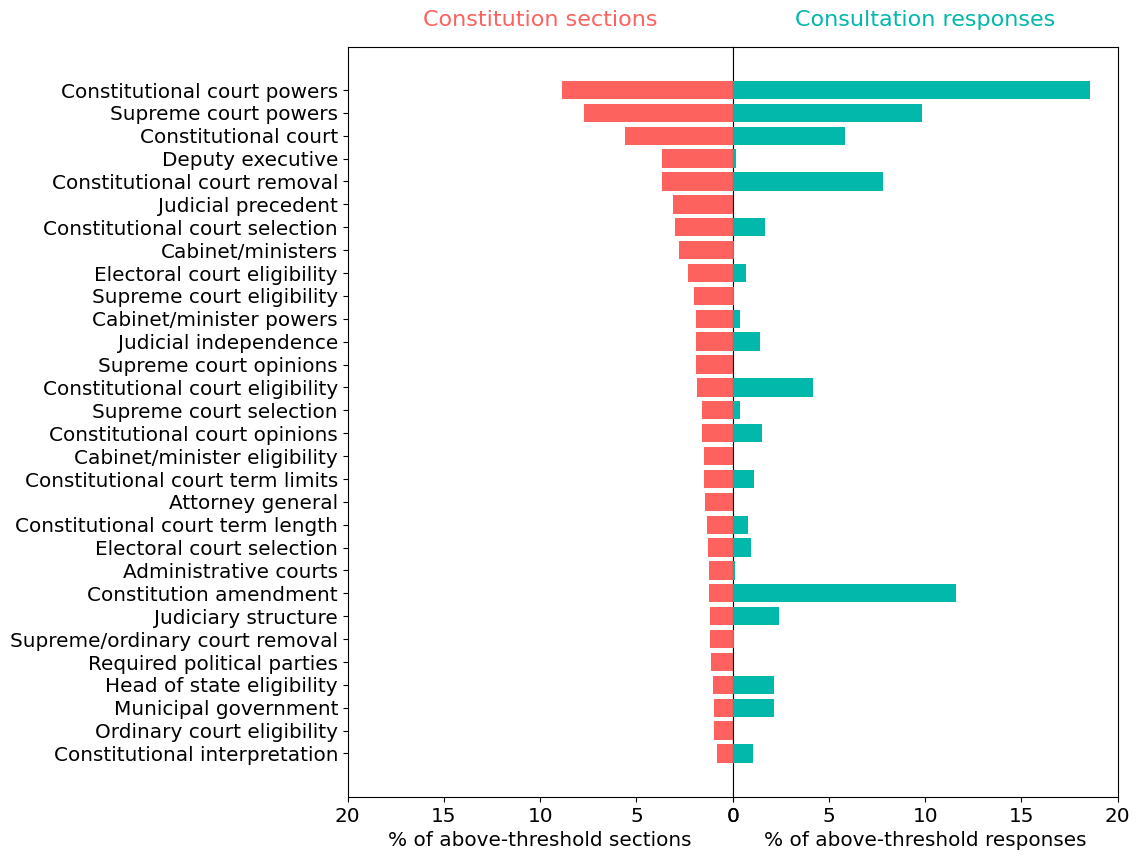

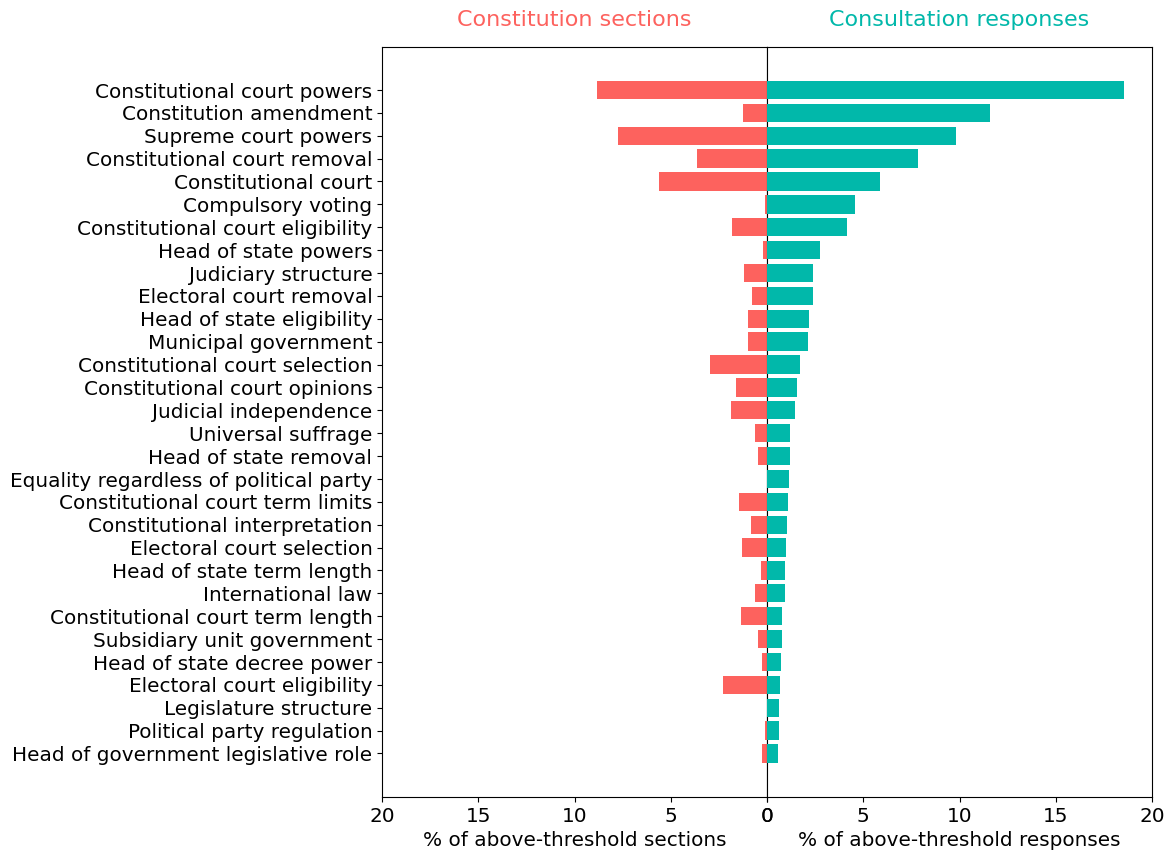

In [14]:
inst_counts_dict = {}

for row in distribution_data:
    if int(row[dist_header.index('Institution topic')]) == 1:
        # Use topic labels
        inst_counts_dict[row[1]] = []
        inst_counts_dict[row[1]].append(int(row[dist_header.index('# Constitution sections')]))
        inst_counts_dict[row[1]].append(int(row[dist_header.index('# Aggregated responses')]))
        inst_counts_dict[row[1]].append(int(row[dist_header.index('# Regional responses')]))
        inst_counts_dict[row[1]].append(int(row[dist_header.index('# Provincial responses')]))
        inst_counts_dict[row[1]].append(int(row[dist_header.index('# ELA responses')]))

tot_const = sum([v[0] for _,v in inst_counts_dict.items()])
tot_aggr = sum([v[1] for _,v in inst_counts_dict.items()])
tot_reg = sum([v[2] for _,v in inst_counts_dict.items()])
tot_prov = sum([v[3] for _,v in inst_counts_dict.items()])
tot_ela = sum([v[4] for _,v in inst_counts_dict.items()])

# Convert counts to percentages of total
inst_percent_dict = {}
for k,v in inst_counts_dict.items():
    inst_percent_dict[k] = [round((v[0]/tot_const)*100,2),\
                       round((v[1]/tot_aggr)*100,2),\
                       round((v[2]/tot_aggr)*100,2),\
                       round((v[3]/tot_aggr)*100,2),\
                       round((v[4]/tot_aggr)*100,2)]

# Sort by constitutions scores
sorted_percent_dict = sorted(inst_percent_dict.items(),key=lambda kv:kv[1][0],reverse=False)

plot_birectional([(t[0],t[1][0]) for t in sorted_percent_dict][-30:],\
                 [(t[0],t[1][1]) for t in sorted_percent_dict][-30:],\
                 ['Constitution sections','Consultation responses'],labelled=True,file='figure_4a')

# Sort by agrregated scores scores
sorted_percent_dict = sorted(inst_percent_dict.items(),key=lambda kv:kv[1][1],reverse=False)

plot_birectional([(t[0],t[1][0]) for t in sorted_percent_dict][-30:],\
                 [(t[0],t[1][1]) for t in sorted_percent_dict][-30:],\
                 ['Constitution sections','Consultation responses'],labelled=True,file='figure_4b')


### Stats - constitutions and source type

In [15]:
# Print stats
print('Const-Aggr',stats.pearsonr(\
            [v[0] for k,v in inst_percent_dict.items()],[v[1] for k,v in inst_percent_dict.items()]))
print('Const-Reg',stats.pearsonr(\
            [v[0] for k,v in inst_percent_dict.items()],[v[2] for k,v in inst_percent_dict.items()]))
print('Const-Prov',stats.pearsonr(\
            [v[0] for k,v in inst_percent_dict.items()],[v[3] for k,v in inst_percent_dict.items()]))
print('Const-ELA',stats.pearsonr(\
            [v[0] for k,v in inst_percent_dict.items()],[v[4] for k,v in inst_percent_dict.items()]))

print()

print('Reg-Prov',stats.pearsonr(\
            [v[2] for k,v in inst_percent_dict.items()],[v[3] for k,v in inst_percent_dict.items()]))
print('Reg-ELA',stats.pearsonr(\
            [v[2] for k,v in inst_percent_dict.items()],[v[4] for k,v in inst_percent_dict.items()]))
print('Prov-ELA',stats.pearsonr(\
            [v[3] for k,v in inst_percent_dict.items()],[v[4] for k,v in inst_percent_dict.items()]))


Const-Aggr PearsonRResult(statistic=0.7531822782052338, pvalue=6.125419086300638e-35)
Const-Reg PearsonRResult(statistic=0.7377338378489386, pvalue=7.0060879622492e-33)
Const-Prov PearsonRResult(statistic=0.7268317328784033, pvalue=1.6319072652063891e-31)
Const-ELA PearsonRResult(statistic=0.7499140133654776, pvalue=1.7184242717238958e-34)

Reg-Prov PearsonRResult(statistic=0.9974482296841265, pvalue=1.3748732006263454e-210)
Reg-ELA PearsonRResult(statistic=0.9388896866503491, pvalue=3.1778191442319814e-86)
Prov-ELA PearsonRResult(statistic=0.9437119546657975, pvalue=2.2364209207397683e-89)


### Stats - municipality type

In [16]:
inst_municipality_count_dict = {}

for row in municipality_data:
    if int(row[dist_header.index('Institution topic')]) == 1:
        inst_municipality_count_dict[row[0]] = []
        inst_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# Provincial Urban')]))
        inst_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# Provincial Rural')]))
        inst_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# Provincial Mixed')]))
        inst_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# ELA Urban')]))
        inst_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# ELA Rural')]))
        inst_municipality_count_dict[row[0]].append(int(row[municipality_header.index('# ELA Mixed')]))

tot_prov_urban = sum([v[0] for _,v in inst_municipality_count_dict.items()])
tot_prov_rural = sum([v[1] for _,v in inst_municipality_count_dict.items()])
tot_prov_mixed = sum([v[2] for _,v in inst_municipality_count_dict.items()])
tot_ela_urban = sum([v[3] for _,v in inst_municipality_count_dict.items()])
tot_ela_rural = sum([v[4] for _,v in inst_municipality_count_dict.items()])
tot_ela_mixed = sum([v[5] for _,v in inst_municipality_count_dict.items()])

# Convert counts to percentages of total
municipality_percent_dict = {}
for k,v in inst_municipality_count_dict.items():
    municipality_percent_dict[k] = [round((v[0]/tot_prov_urban)*100,2),\
                       round((v[1]/tot_prov_rural)*100,2),\
                       round((v[2]/tot_prov_mixed)*100,2),\
                       round((v[3]/tot_ela_urban)*100,2),\
                       round((v[4]/tot_ela_rural)*100,2),\
                       round((v[5]/tot_ela_mixed)*100,2)]
    
# Print stats
print('Prov_urban-Prov_rural',stats.pearsonr(\
            [v[0] for k,v in municipality_percent_dict.items()],[v[1] for k,v in municipality_percent_dict.items()]))
print('Prov_urban-Prov_mixed',stats.pearsonr(\
            [v[0] for k,v in municipality_percent_dict.items()],[v[2] for k,v in municipality_percent_dict.items()]))
print('Prov_rural-Prov_mixed',stats.pearsonr(\
            [v[1] for k,v in municipality_percent_dict.items()],[v[2] for k,v in municipality_percent_dict.items()]))

print()

print('ELA_urban-ELA_rural',stats.pearsonr(\
            [v[3] for k,v in municipality_percent_dict.items()],[v[4] for k,v in municipality_percent_dict.items()]))
print('ELA_urban-ELA_mixed',stats.pearsonr(\
            [v[3] for k,v in municipality_percent_dict.items()],[v[5] for k,v in municipality_percent_dict.items()]))
print('ELA_rural-ELA_mixed',stats.pearsonr(\
            [v[4] for k,v in municipality_percent_dict.items()],[v[5] for k,v in municipality_percent_dict.items()]))

print()

print('Prov_urban-ELA_urban',stats.pearsonr(\
            [v[0] for k,v in municipality_percent_dict.items()],[v[3] for k,v in municipality_percent_dict.items()]))
print('Prov_rural-ELA_rural',stats.pearsonr(\
            [v[1] for k,v in municipality_percent_dict.items()],[v[4] for k,v in municipality_percent_dict.items()]))
print('Prov_mixed-ELA_mixed',stats.pearsonr(\
            [v[2] for k,v in municipality_percent_dict.items()],[v[5] for k,v in municipality_percent_dict.items()]))



Prov_urban-Prov_rural PearsonRResult(statistic=0.9340478690131535, pvalue=2.6238256034119525e-83)
Prov_urban-Prov_mixed PearsonRResult(statistic=0.8631872760147341, pvalue=6.535095279858686e-56)
Prov_rural-Prov_mixed PearsonRResult(statistic=0.9014111715475875, pvalue=4.467689703968361e-68)

ELA_urban-ELA_rural PearsonRResult(statistic=0.9850316114192561, pvalue=6.539593155041845e-141)
ELA_urban-ELA_mixed PearsonRResult(statistic=0.9837355662014247, pvalue=1.1806444084467938e-137)
ELA_rural-ELA_mixed PearsonRResult(statistic=0.992936760966733, pvalue=1.9391791071295975e-170)

Prov_urban-ELA_urban PearsonRResult(statistic=0.9411456038439427, pvalue=1.1495185693914647e-87)
Prov_rural-ELA_rural PearsonRResult(statistic=0.8995147126553564, pvalue=2.3150068457614512e-67)
Prov_mixed-ELA_mixed PearsonRResult(statistic=0.8508818625410964, pvalue=9.189202154013558e-53)
